## Лабораторна робота 2
#### Рижкін Юрій
###### Варіант 9

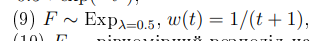

In [16]:
n1 = 300
n2 = 300
lambda = 1/2


In [2]:
w = function (t){
    return (1/(t+1))    
}

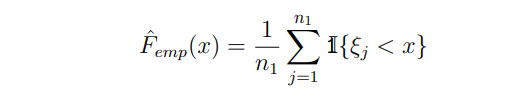

In [11]:
Femp <- function(x , sample){
    return (1/length(sample)*sum(sample < x))
}

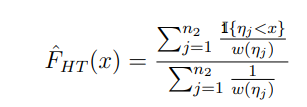

In [12]:
FunHT = function(x,sample){
    wei = 1/w(sample)
    return (sum((sample<x)*wei)/sum(wei))
}

In [13]:
biasedSample = function(n) {
 i = 1
 sample = c()
 
 while(i <= n) {
 unif = runif(1)
 x = rexp(1, lambda)
 
 if(unif < w(x)) {
 sample = c(sample, x)
 i = i + 1
 }
 }
 return(sample)
}

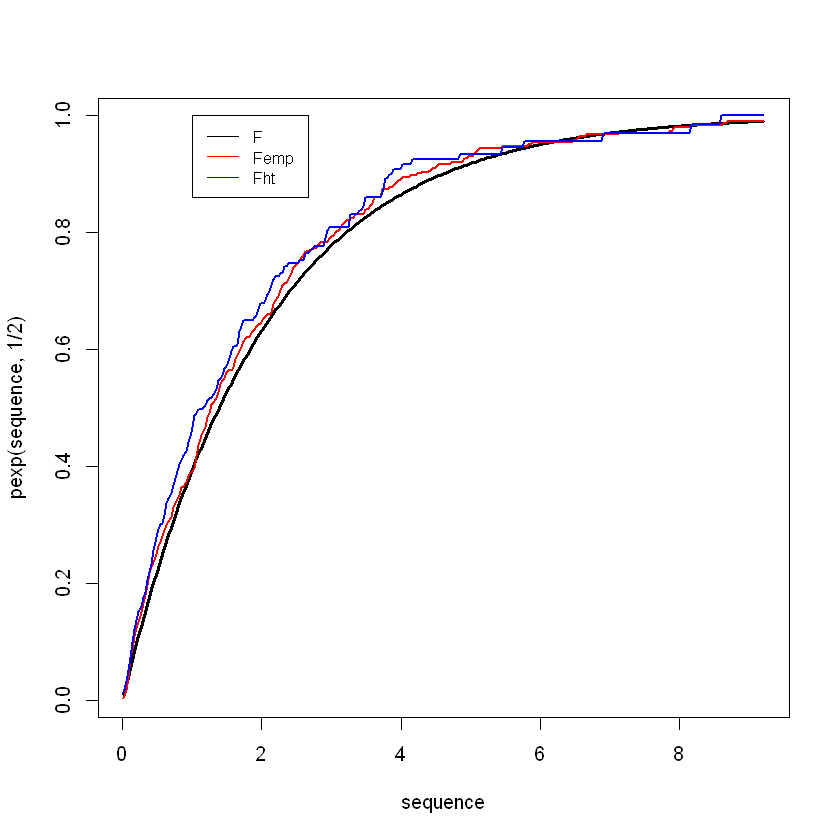

In [17]:
ksi = rexp(n1, 1/2)
eta = biasedSample(n2)
q_001 <- qexp(0.01,lambda)
q_099 <- qexp(0.99,lambda)

sequence = seq(q_001,q_099,length.out = n1)
plot(sequence, pexp(sequence,1/2), type='l', lwd = 3)
lines(sequence, sapply(sequence, Femp, sample=ksi), col='red', lwd = 2)
lines(sequence, sapply(sequence, FunHT, sample=eta), col='blue', lwd = 2)
legend(1, 1, legend=c("F", "Femp", "Fht"),
 col=c("black", "red", "blue"), lty=1:1, cex=0.8)


На око можна сказати, що емпірична функція краще виглядає.

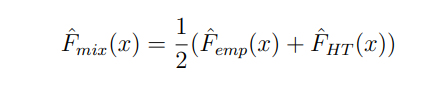

In [22]:
Fmix = function(x, sample1, sample2){

 F_hat = 1 / 2 * (Femp(x, sample1) + FunHT(x, sample2))

 return(F_hat)
} 


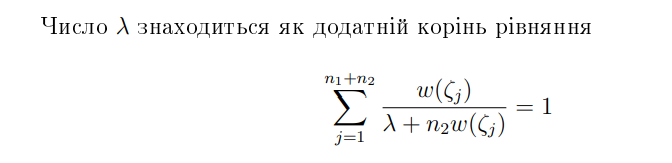

In [19]:
library(nleqslv)
findLambda = function(sample, n2) {
 fn = function(x, sample, n2) {
 y = sum(w(sample) / (x + n2 * w(sample))) - 1
 y
 }

 lambda = nleqslv(1, fn, sample=sample, n2=n2)$x

 return(lambda)
}

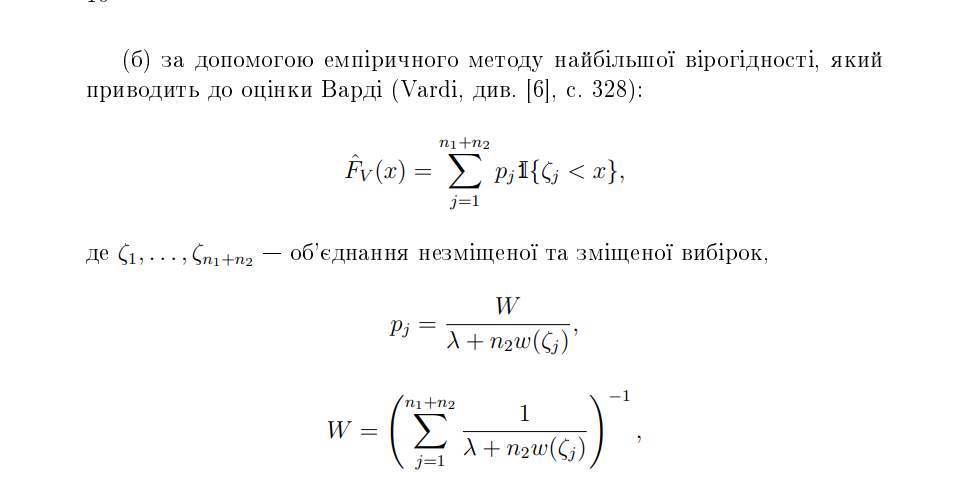

In [20]:
Fv = function(x, sample, n2) {
 lambda = findLambda(sample, n2)

 W = 1 / sum(1 / (lambda + n2 * w(sample)))

 p = W / (lambda + n2 * w(sample))

 return(sum((sample < x) * p))
}


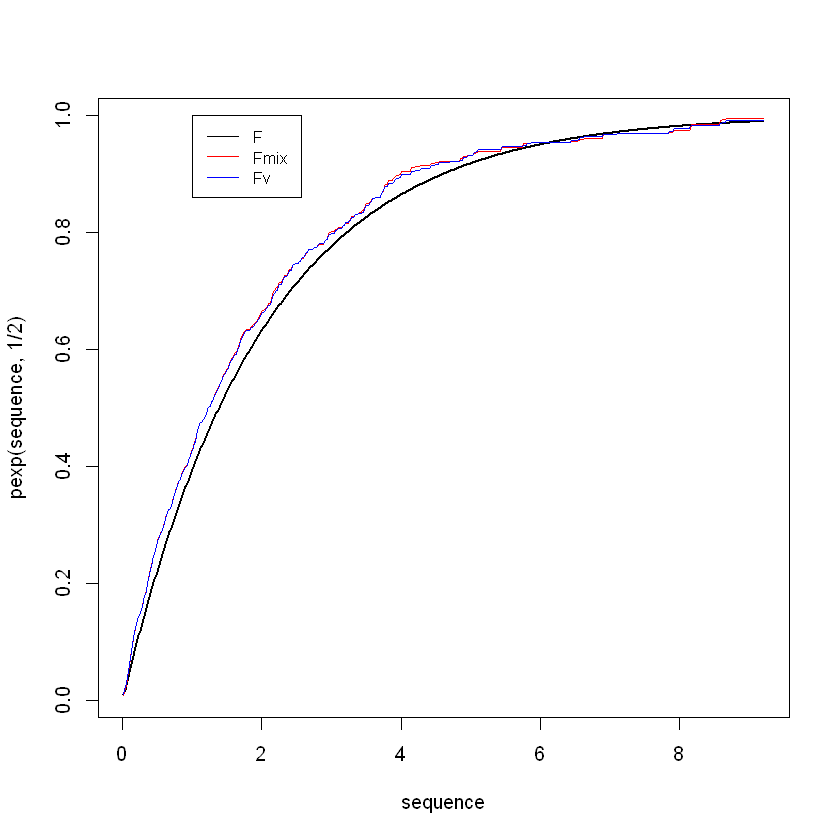

In [29]:
sequence = seq(q_001, q_099, length.out = n1+n2)
plot(sequence, pexp(sequence, 1/2), type='l', lwd = 2)
lines(sequence, sapply(sequence, Fmix, sample1=ksi, sample2=eta), col='red', lwd = 1)
lines(sequence, sapply(sequence, Fv, sample=c(ksi, eta), n2=n2), col='blue', lwd = 1)
legend(1, 1, legend=c("F", "Fmix", "Fv"),
 col=c("black", "red", "blue"), lty=1:1, cex=0.8)


Ми можемо побачити, що наші оцінки доволі схожі одна на одну. Варто підмітити, що ці оцінки набагато краще ніж оцінки, які у нас були в першій частині лабараторних